In [ ]:
# Import libraries

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/mental_health_wearable_train_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/mental_health_wearable_test_data.csv')

Data Understanding and preprocessing

In [ ]:
train_df.head()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mood_Rating,Mental_Health_Condition
0,94,8.016991,9226,4,0
1,84,9.965728,3047,1,0
2,88,5.183456,13411,3,1
3,91,4.390005,13753,4,1
4,104,9.677121,4866,2,0


In [ ]:
test_df.head()

,Heart_Rate_BPM,Sleep_Duration_Hours,Physical_Activity_Steps,Mood_Rating,Mental_Health_Condition
0,65,8.072279,5442,5,0
1,68,4.171120,4868,1,1
2,117,4.929056,2687,9,1
3,60,9.870967,6204,3,1
4,63,5.992443,13912,9,1


In [ ]:
# Check for columns names

train_df.columns, test_df.columns

(Index(['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps',
        'Mood_Rating', 'Mental_Health_Condition'],
       dtype='object'),
 Index(['Heart_Rate_BPM', 'Sleep_Duration_Hours', 'Physical_Activity_Steps',
        'Mood_Rating', 'Mental_Health_Condition'],
       dtype='object'))

In [ ]:
# Check for info

train_df.info, test_df.info

(<bound method DataFrame.info of       Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  \
 0                 94              8.016991                     9226   
 1                 84              9.965728                     3047   
 2                 88              5.183456                    13411   
 3                 91              4.390005                    13753   
 4                104              9.677121                     4866   
 ...              ...                   ...                      ...   
 5995              98              9.469581                     8098   
 5996              74              9.352672                     3401   
 5997              66              6.734415                    10789   
 5998             104              9.053162                    11425   
 5999              98              9.373121                     6381   
 
       Mood_Rating  Mental_Health_Condition  
 0               4                        0  
 1        

In [ ]:
train_df.shape, test_df.shape

((6000, 5), (4000, 5))

In [ ]:
print(train_df.describe())

       Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  \
count     6000.000000           6000.000000              6000.000000   
mean        89.758833              6.984680              8054.779667   
std         17.408834              1.738325              4082.019097   
min         60.000000              4.000317              1002.000000   
25%         75.000000              5.462698              4432.250000   
50%         90.000000              6.964506              8121.000000   
75%        105.000000              8.514003             11624.000000   
max        119.000000              9.998831             14998.000000   

       Mood_Rating  Mental_Health_Condition  
count  6000.000000              6000.000000  
mean      5.085333                 0.515167  
std       2.544955                 0.499812  
min       1.000000                 0.000000  
25%       3.000000                 0.000000  
50%       5.000000                 1.000000  
75%       7.000000           

In [ ]:
print(test_df.describe())

       Heart_Rate_BPM  Sleep_Duration_Hours  Physical_Activity_Steps  \
count     4000.000000           4000.000000              4000.000000   
mean        89.916750              6.969217              8072.360500   
std         17.160258              1.719712              4045.150227   
min         60.000000              4.001446              1000.000000   
25%         75.000000              5.503133              4513.250000   
50%         90.000000              6.934642              8110.500000   
75%        105.000000              8.466895             11606.250000   
max        119.000000              9.996764             14989.000000   

       Mood_Rating  Mental_Health_Condition  
count  4000.000000               4000.00000  
mean      5.034750                  0.51650  
std       2.588671                  0.49979  
min       1.000000                  0.00000  
25%       3.000000                  0.00000  
50%       5.000000                  1.00000  
75%       7.000000           

In [ ]:
# Check for missing values

print(train_df.isnull().sum())
print(test_df.isnull().sum())

Heart_Rate_BPM             0
Sleep_Duration_Hours       0
Physical_Activity_Steps    0
Mood_Rating                0
Mental_Health_Condition    0
dtype: int64
Heart_Rate_BPM             0
Sleep_Duration_Hours       0
Physical_Activity_Steps    0
Mood_Rating                0
Mental_Health_Condition    0
dtype: int64


In [ ]:
# Define X_train, y_train, X_test, y_test

X_train = train_df[['Heart_Rate_BPM','Sleep_Duration_Hours', 'Physical_Activity_Steps']].values
y_train = train_df['Mental_Health_Condition'].values


X_test = test_df[['Heart_Rate_BPM','Sleep_Duration_Hours', 'Physical_Activity_Steps']].values
y_test = test_df['Mental_Health_Condition'].values

In [ ]:
# Check rows and columns

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(6000, 3)
(6000,)
(4000, 3)
(4000,)


SVM Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------ SVM Classifier ------------------##
#--------------------------------------------------

from sklearn.svm import SVC

## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                     class_weight='balanced'))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced'))])

=== Evaluation on Test Data: SVM - RBF Kernel ===
Accuracy: 0.66525
Precision: 0.6653699241656206
Recall: 0.66525
F1 Score: 0.6652949551426385

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      1934
           1       0.68      0.67      0.67      2066

    accuracy                           0.67      4000
   macro avg       0.66      0.67      0.66      4000
weighted avg       0.67      0.67      0.67      4000



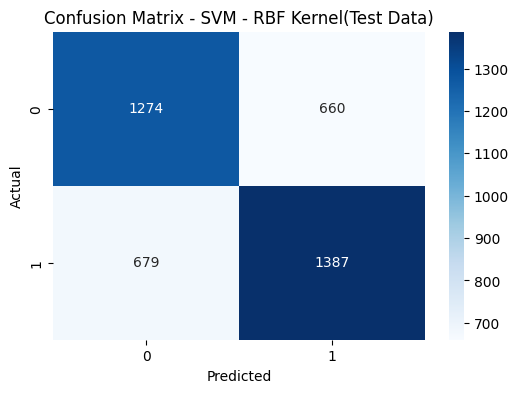

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


models_to_evaluate = [
    (svcRBF_pipeline, "SVM - RBF Kernel")
]

for model, model_name in models_to_evaluate:
    print(f"=== Evaluation on Test Data: {model_name} ===")

    # Predict
    y_pred = model.predict(X_test)

    # Basic metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    # Full classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}(Test Data)")
    plt.show()

    print("="*40 + "\n")

=== Evaluation on Training Data: SVM - RBF Kernel ===
Accuracy: 0.6791666666666667
Precision: 0.6791390526510938
Recall: 0.6791666666666667
F1 Score: 0.679151331334771

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      2909
           1       0.69      0.69      0.69      3091

    accuracy                           0.68      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.68      0.68      0.68      6000



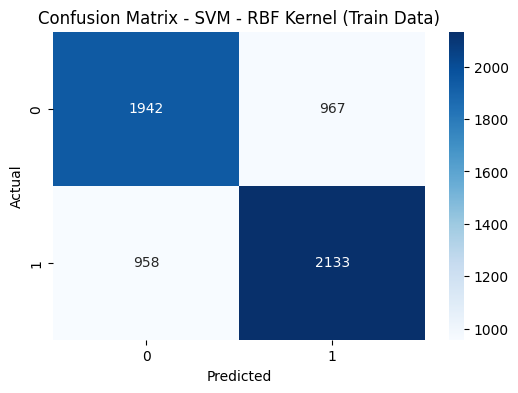

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of trained models and their names
models_to_evaluate = [
    (svcRBF_pipeline, "SVM - RBF Kernel")
]

for model, model_name in models_to_evaluate:
    print(f"=== Evaluation on Training Data: {model_name} ===")

    # Predict
    y_pred_train = model.predict(X_train)

    # Basic metrics
    print("Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
    print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
    print("F1 Score:", f1_score(y_train, y_pred_train, average='weighted'))

    # Full classification report
    print("\nClassification Report:\n", classification_report(y_train, y_pred_train))

    # Confusion Matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name} (Train Data)")
    plt.show()

    print("="*40 + "\n")


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("Cross-validation results:\n")

# Evaluate each model using cross-validation
models_to_evaluate = [
    (svcRBF_pipeline, "SVM - RBF Kernel")
]

for model, model_name in models_to_evaluate:
    print(f"=== Cross-validation: {model_name} ===")

    # Perform cross-validation (e.g., with 5 folds)
    # Using X_train and y_train for cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    print(f"Mean accuracy: {cv_scores.mean():.4f}")
    print(f"Scores: {cv_scores}")

    print("="*40 + "\n")

Cross-validation results:

=== Cross-validation: SVM - RBF Kernel ===
Mean accuracy: 0.6728
Scores: [0.685      0.66       0.67       0.67916667 0.67      ]



Logistic Regression

In [ ]:
# Logistic Regression Model

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

steps = [('scaler', StandardScaler()),
         ('logReg', LogisticRegression(penalty = "l1", C =1, solver='liblinear'))]

LR_pipeline = Pipeline(steps)
LR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logReg',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

[[1242  692]
 [ 656 1410]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1934
           1       0.67      0.68      0.68      2066

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000

0.731523378959687


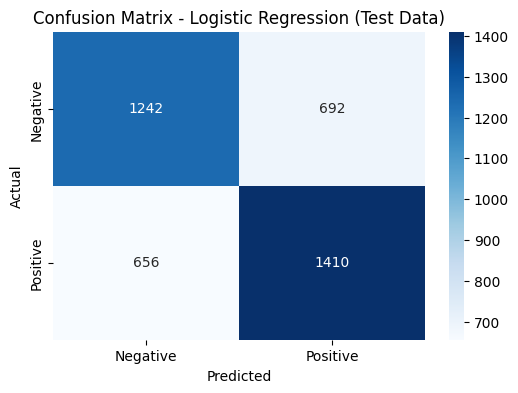

In [ ]:
# Model Evaluation

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

y_pred = LR_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cm)
print(cr)

y_pred_testP= LR_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_testP[:,1])
print(auc)

# Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Logistic Regression (Test Data)")
plt.show()

[[1885 1024]
 [ 923 2168]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2909
           1       0.68      0.70      0.69      3091

    accuracy                           0.68      6000
   macro avg       0.68      0.67      0.67      6000
weighted avg       0.68      0.68      0.68      6000

0.7459873912874725


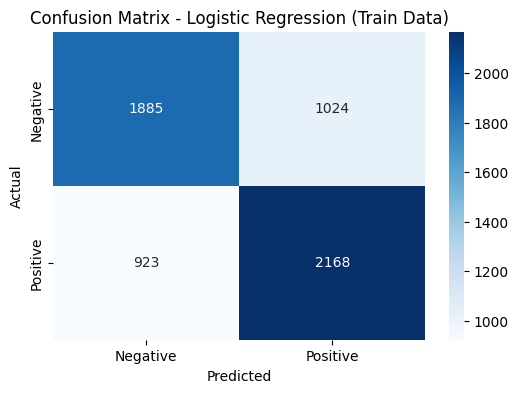

In [ ]:
# For training dataset

ypred_train = LR_pipeline.predict(X_train)
cm = confusion_matrix(y_train, ypred_train)
cr = classification_report(y_train, ypred_train)

print(cm)
print(cr)

ypred_trainP = LR_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

# Confusion Matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Logistic Regression (Train Data)")
plt.show()

In [ ]:
# Cross Validation

from sklearn.model_selection import GridSearchCV

param_grid = {
    'logReg__penalty': ['l1', 'l2'],
    'logReg__C': [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(LR_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters from CV:", grid.best_params_)
print("Best CV AUC Score:", grid.best_score_)

Best Parameters from CV: {'logReg__C': 10, 'logReg__penalty': 'l1'}
Best CV AUC Score: 0.7456414421669193


Naive Bayes Classifier

In [ ]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

ypred_test_g = gnb.predict(X_test)
mat_clf_g = confusion_matrix(y_test, ypred_test_g)
report_clf_g = classification_report(y_test, ypred_test_g)
print(mat_clf_g)
print(report_clf_g)

[[1229  705]
 [ 641 1425]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1934
           1       0.67      0.69      0.68      2066

    accuracy                           0.66      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.66      0.66      0.66      4000



In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
ypred_test_m = mnb.predict(X_test)
mat_clf_m = confusion_matrix(y_test, ypred_test_m)
report_clf_m = classification_report(y_test, ypred_test_m)
print(mat_clf_m)
print(report_clf_m)

[[1008  926]
 [ 963 1103]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1934
           1       0.54      0.53      0.54      2066

    accuracy                           0.53      4000
   macro avg       0.53      0.53      0.53      4000
weighted avg       0.53      0.53      0.53      4000



KNN classifier

In [ ]:
# Import necessary libraries for KNN and evaluation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Feature scaling completed!
Training data shape: (6000, 3)
Test data shape: (4000, 3)


k=1: CV Accuracy = 0.5968
k=21: CV Accuracy = 0.6672
k=41: CV Accuracy = 0.6655
k=61: CV Accuracy = 0.6680
k=81: CV Accuracy = 0.6695


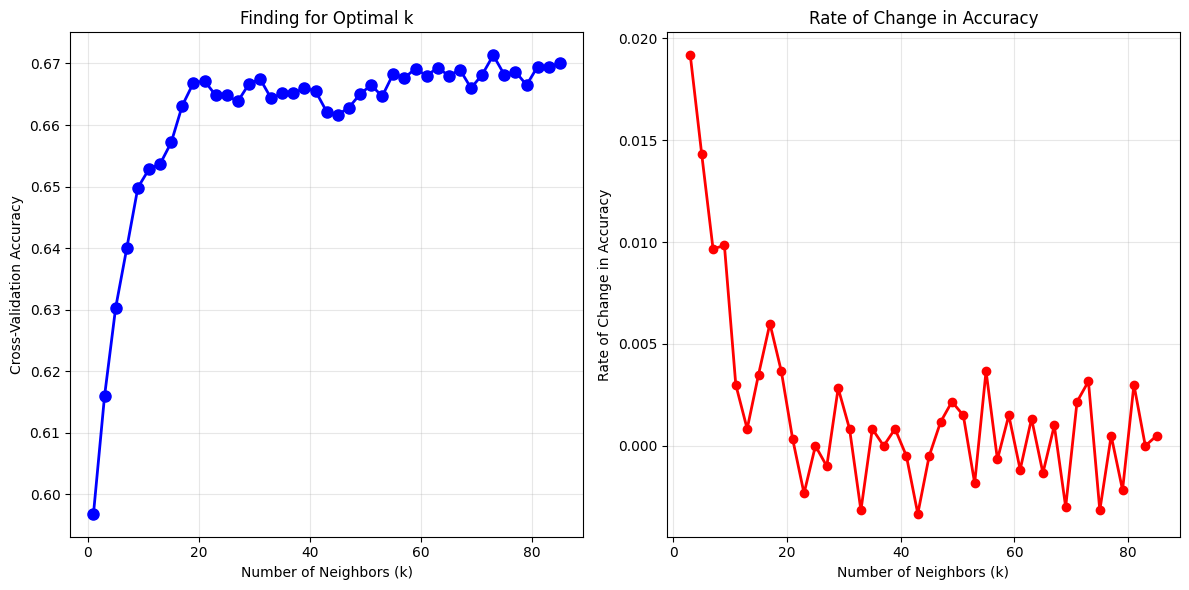


Optimal k value: 73
Maximum cross-validation accuracy: 0.6713

Top 5 k values:
1. k=73, accuracy=0.6713
2. k=85, accuracy=0.6700
3. k=83, accuracy=0.6695
4. k=81, accuracy=0.6695
5. k=63, accuracy=0.6693


In [ ]:
# Method to find optimal k value
def find_optimal_k(X_train, y_train, max_k=85):
    """
    Implement Elbow method to find optimal k value for KNN
    """
    k_range = range(1, max_k + 1, 2)  # Only odd values
    accuracies = []

    for k in k_range:
        # Use cross-validation to get more robust accuracy estimates
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        accuracies.append(cv_scores.mean())

        if k % 20 == 1:  # Print every 10th odd value (1, 21, 41, 61, 81)
            print(f"k={k}: CV Accuracy = {cv_scores.mean():.4f}")

    return k_range, accuracies

# Find optimal k
k_range, accuracies = find_optimal_k(X_train_scaled, y_train, max_k=85)

# Plot the curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Finding for Optimal k')
plt.grid(True, alpha=0.3)

# Calculate the rate of change to help identify
rate_of_change = np.diff(accuracies)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], rate_of_change, 'ro-', linewidth=2, markersize=6)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Rate of Change in Accuracy')
plt.title('Rate of Change in Accuracy')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (where accuracy is highest)
optimal_k = k_range[np.argmax(accuracies)]
max_accuracy = max(accuracies)

print(f"\nOptimal k value: {optimal_k}")
print(f"Maximum cross-validation accuracy: {max_accuracy:.4f}")

# Also show top 5 k values
top_indices = np.argsort(accuracies)[-5:][::-1]
print("\nTop 5 k values:")
for i, idx in enumerate(top_indices):
    print(f"{i+1}. k={k_range[idx]}, accuracy={accuracies[idx]:.4f}")

In [ ]:
# Train KNN classifier with optimal k value
print(f"Training KNN classifier with k={optimal_k}...")

# Create and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Get prediction probabilities for AUC calculation
y_train_pred_proba = knn_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

print("Model training and prediction completed!")
print(f"Training set size: {len(y_train)}")
print(f"Test set size: {len(y_test)}")

Training KNN classifier with k=73...
Model training and prediction completed!
Training set size: 6000
Test set size: 4000


In [ ]:
# Comprehensive Model Evaluation
def evaluate_model(y_true, y_pred, y_pred_proba, dataset_name):
    """
    Comprehensive evaluation function for binary classification
    """
    # print(f"\n{'='*60}")
    # print(f"EVALUATION RESULTS FOR {dataset_name.upper()} DATASET")
    # print(f"{'='*60}")

    # Basic accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # print(f"Accuracy: {accuracy:.4f}")

    # Classification report (includes precision, recall, f1-score, support)
    # print(f"\nClassification Report:")
    # print(classification_report(y_true, y_pred, target_names=['No Mental Health Issue', 'Mental Health Issue']))

    # AUC Score
    auc_score = roc_auc_score(y_true, y_pred_proba)
    # print(f"AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    # print(f"\nConfusion Matrix:")
    # print(cm)

    return {
        'accuracy': accuracy,
        'auc_score': auc_score,
        'confusion_matrix': cm,
        'classification_report': classification_report(y_true, y_pred, output_dict=True)
    }

# Evaluate Training Dataset
train_results = evaluate_model(y_train, y_train_pred, y_train_pred_proba, "Training")

# Evaluate Testing Dataset
test_results = evaluate_model(y_test, y_test_pred, y_test_pred_proba, "Testing")

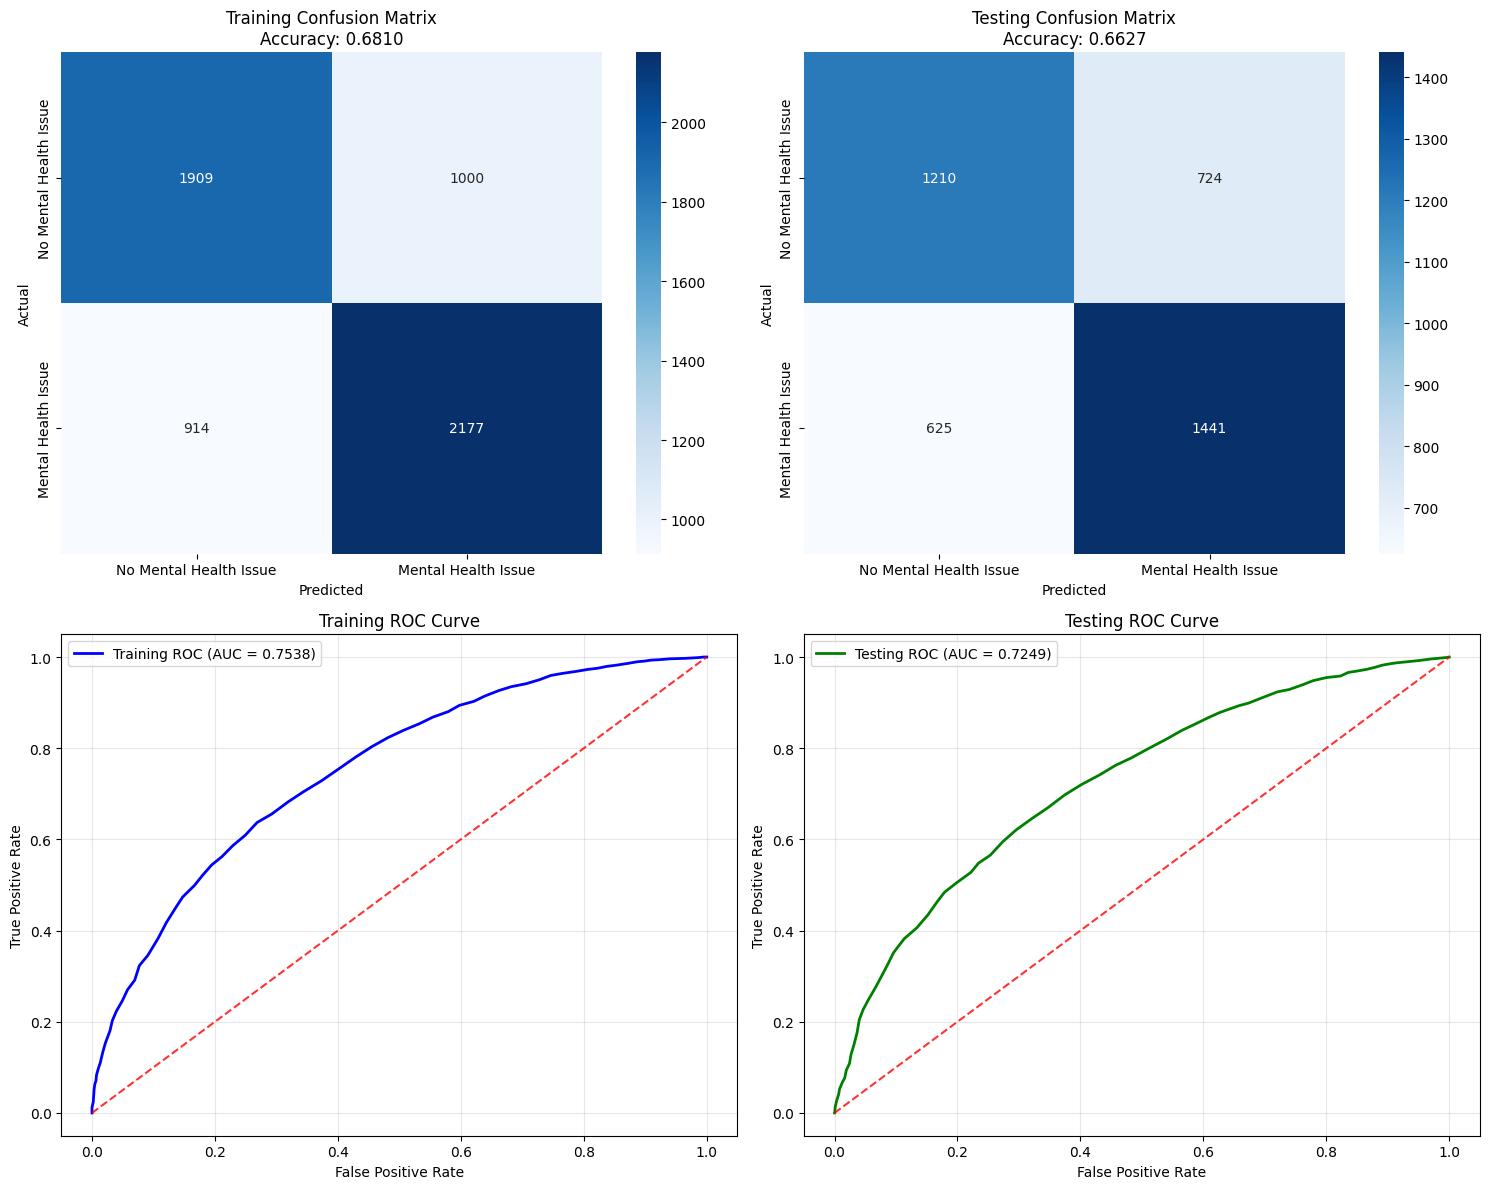

In [ ]:
# Visualizations for Model Evaluation
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix for Training Data
sns.heatmap(train_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Mental Health Issue', 'Mental Health Issue'],
            yticklabels=['No Mental Health Issue', 'Mental Health Issue'],
            ax=axes[0,0])
axes[0,0].set_title(f'Training Confusion Matrix\nAccuracy: {train_results["accuracy"]:.4f}')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Confusion Matrix for Testing Data
sns.heatmap(test_results['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Mental Health Issue', 'Mental Health Issue'],
            yticklabels=['No Mental Health Issue', 'Mental Health Issue'],
            ax=axes[0,1])
axes[0,1].set_title(f'Testing Confusion Matrix\nAccuracy: {test_results["accuracy"]:.4f}')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# ROC Curve for Training Data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
axes[1,0].plot(fpr_train, tpr_train, color='blue', linewidth=2,
               label=f'Training ROC (AUC = {train_results["auc_score"]:.4f})')
axes[1,0].plot([0, 1], [0, 1], color='red', linestyle='--', alpha=0.8)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('Training ROC Curve')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# ROC Curve for Testing Data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
axes[1,1].plot(fpr_test, tpr_test, color='green', linewidth=2,
               label=f'Testing ROC (AUC = {test_results["auc_score"]:.4f})')
axes[1,1].plot([0, 1], [0, 1], color='red', linestyle='--', alpha=0.8)
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('Testing ROC Curve')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_proba, dataset_name="Mental Health Dataset"):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)  # needs predicted probabilities

    cm = confusion_matrix(y_true, y_pred)

    print(f"\n=== {dataset_name} Evaluation ===")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")

    return {"Mental Health Dataset": dataset_name, "Accuracy": acc, "Precision": prec,
            "Recall": rec, "F1 Score": f1, "ROC AUC": auc}

# Example usage after training your model:
train_report = evaluate_model(y_train, y_train_pred, y_train_pred_proba, "Training Set")
test_report  = evaluate_model(y_test,  y_test_pred,  y_test_pred_proba,  "Testing Set")

# If you want a clean table summary:
import pandas as pd
report_df = pd.DataFrame([train_report, test_report])
print("\n=== Summary Report ===")
print(report_df)


=== Training Set Evaluation ===
Confusion Matrix:
[[1909 1000]
 [ 914 2177]]
Accuracy : 0.6810
Precision: 0.6852
Recall   : 0.7043
F1 Score : 0.6946
ROC AUC  : 0.7538

=== Testing Set Evaluation ===
Confusion Matrix:
[[1210  724]
 [ 625 1441]]
Accuracy : 0.6627
Precision: 0.6656
Recall   : 0.6975
F1 Score : 0.6812
ROC AUC  : 0.7249

=== Summary Report ===
  Mental Health Dataset  Accuracy  Precision    Recall  F1 Score   ROC AUC
0          Training Set   0.68100   0.685238  0.704303  0.694639  0.753771
1           Testing Set   0.66275   0.665589  0.697483  0.681163  0.724949
